sum_conflict: 328069.843
19999


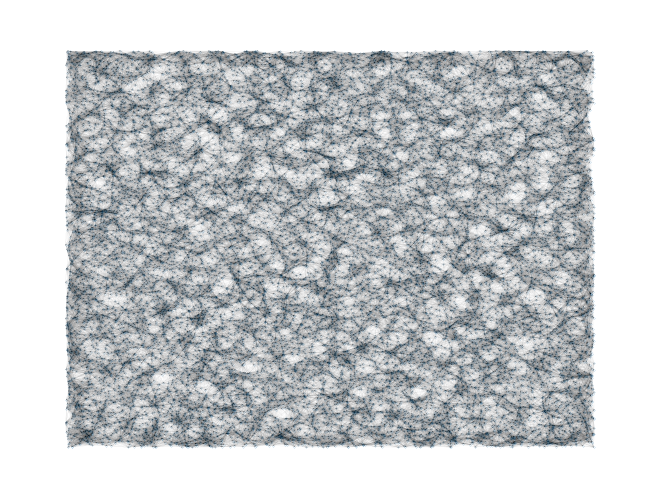

In [1]:
import networkx as nx
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import lil_matrix

# %matplotlib widget
import matplotlib.pyplot as plt
n_nodes = 20000
max_neighbors = 60
p_connection = 0.5 
rs = np.random.RandomState(42)
# Set positions
xy = rs.rand(n_nodes, 2)

# Fill the adjacency matrix
nbrs = NearestNeighbors(n_neighbors=max_neighbors+1).fit(xy)
_, indices = nbrs.kneighbors(xy)

adj = lil_matrix((n_nodes, n_nodes))
for i, neighbors in enumerate(indices):
    for j in neighbors[1:]:
        if p_connection > rs.rand():
            adj[i, j] = np.exp(rs.randn())
adj = adj + adj.T

# Create graph
G = nx.from_scipy_sparse_array(adj)
plt.figure()
nx.draw(G, xy, node_size=0.01, width=0.01);

n_colors = 3
colors = rs.randint(0, n_colors, n_nodes)

sum_conflict = 0
for u, v, data in G.edges(data=True):
    if colors[u] == colors[v]:
        sum_conflict += data['weight']
        
print(f'sum_conflict: {sum_conflict:.3f}')

mx = 0

with open("graph_store", 'w') as ouf:
    ouf.write(f"{n_nodes}\n")
    for u, v, data in G.edges(data=True):
        ouf.write(f"{u} {v} {data['weight']}\n")
        mx = max(mx, u)
        mx = max(mx, v)

print(mx)

 